# Assignment 3: regression exercise
## investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP

In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
PUIDATA = os.getenv("PUIDATA")
print (PUIDATA)

/home/cusp/dcr346/PUIdata


In [3]:
df_mur = pd.read_csv('World firearms murders and ownership - Sheet 1.csv')
df_sh = pd.read_csv('data-pvLFI.csv')
df_pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2.csv', skiprows = (0,2))
df_gdp = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', skiprows = (0,2))

In [4]:
df_mur = df_mur[['Country/Territory','Number of homicides by firearm','Average total all civilian firearms']]
df_mur.columns = ['Country Name','Number of homicides by firearm','Average total all civilian firearms']
df_mur.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [5]:
df_sh.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [6]:
df_pop = df_pop[['Country Name','2012']]
df_pop.columns = ['Country Name', 'pop']
df_pop.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [7]:
df_gdp = df_gdp[['Country Name','2012']]
df_gdp.columns = ['Country Name', 'gdp']
df_gdp.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.153984e+11
3,Albania,1.231978e+10
4,Andorra,3.146152e+09


In [8]:
df_ = df_mur.merge(df_sh, right_on="Country", left_on="Country Name")
df_.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,30.0,3050000.0,Australia,15.0,4
1,Austria,18.0,2500000.0,Austria,30.4,1
2,Canada,173.0,9950000.0,Canada,30.8,4
3,Denmark,15.0,650000.0,Denmark,12.0,0
4,Finland,24.0,2400000.0,Finland,45.3,2


In [9]:
df_popgdp = df_pop.merge(df_gdp, right_on="Country Name", left_on="Country Name")
df_popgdp.head()

,Country Name,pop,gdp
0,Aruba,102577.0,NaN
1,Afghanistan,30696958.0,2.053654e+10
2,Angola,25096150.0,1.153984e+11
3,Albania,2900401.0,1.231978e+10
4,Andorra,82431.0,3.146152e+09


In [10]:
df_ = df_.merge(df_popgdp, right_on="Country Name", left_on="Country Name")
df_.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings,pop,gdp
0,Australia,30.0,3050000.0,Australia,15.0,4,22728254.0,1.538194e+12
1,Austria,18.0,2500000.0,Austria,30.4,1,8429991.0,4.074516e+11
2,Canada,173.0,9950000.0,Canada,30.8,4,34750545.0,1.824289e+12
3,Denmark,15.0,650000.0,Denmark,12.0,0,5591572.0,3.271489e+11
4,Finland,24.0,2400000.0,Finland,45.3,2,5413971.0,2.567065e+11


## exploration
### plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)
Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)
Are there any points that look like they may be outilers?

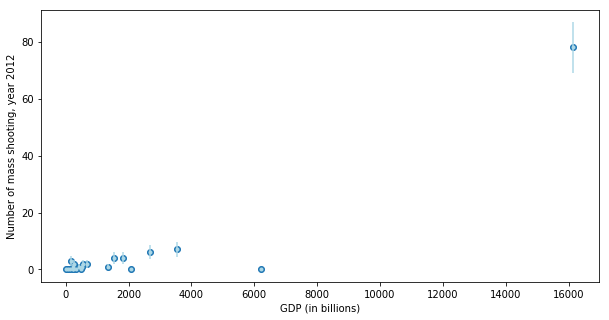

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [11]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.', color='lightblue')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting, year 2012")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

### The above plot has a major outlier: based on the data is the US with 78 mass shooting in 2012.

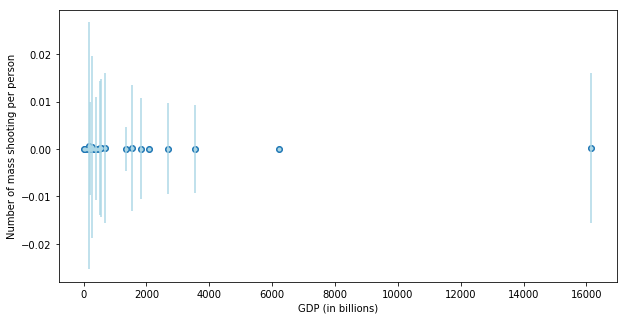

In [12]:
# plot mass shooting vs gdp per person + errorbars (y errors)

df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['shootingspp'])
ax.errorbar(df_.gdp / 1e9, df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.', color='lightblue')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()

### The above plot also has a major outlier: US 


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [13]:
df_['AverageFirearmspp'] = df_["Average total all civilian firearms"] / df_['pop']
df_.tail()

,Country Name,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings,pop,gdp,shootingspp,AverageFirearmspp
17,Portugal,44.0,900000.0,Portugal,8.5,1,10514844.0,2.163682e+11,0.000095,0.085593
18,Spain,90.0,4500000.0,Spain,10.4,1,46773055.0,1.335946e+12,0.000021,0.096209
19,Sweden,37.0,2800000.0,Sweden,31.6,2,9519374.0,5.438806e+11,0.000210,0.294137
20,Switzerland,57.0,3400000.0,Switzerland,45.7,2,7996861.0,6.650541e+11,0.000250,0.425167
21,United States,9146.0,270000000.0,United States,88.8,78,313998379.0,1.615526e+13,0.000248,0.859877


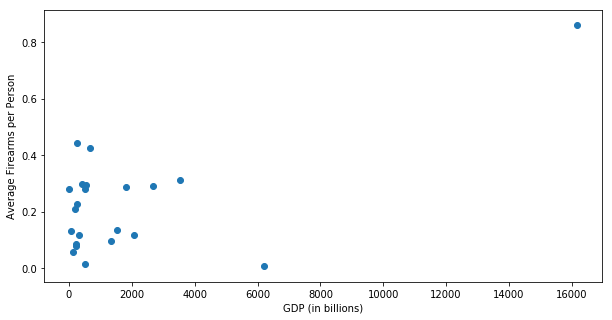

In [14]:
# no error bars

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['AverageFirearmspp'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average Firearms per Person")
ax.set_ylim()
pl.show()

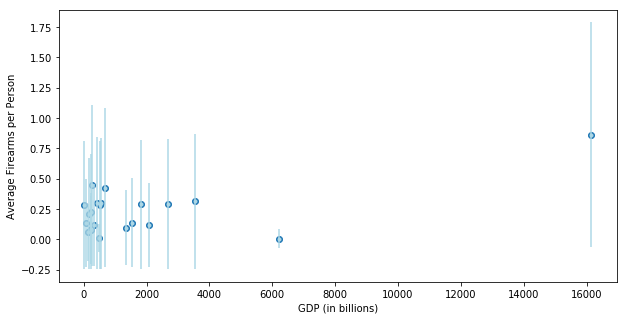

In [15]:
# with error bars

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['AverageFirearmspp'])
ax.errorbar(df_.gdp / 1e9, df_['AverageFirearmspp'], 
            yerr = np.sqrt(df_['AverageFirearmspp'] * 1.0), fmt = '.', color='lightblue')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average Firearms per Person")
ax.set_ylim()
pl.show()

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

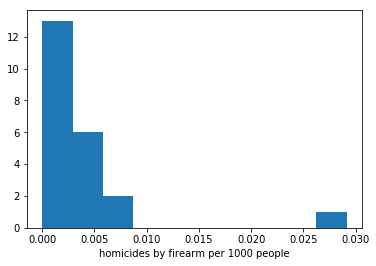

In [16]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

In [17]:
# then against the country GDP, with statistical errors. 
# are there points that look like outliers?

df_['homicidepp'] = df_['Number of homicides by firearm'] / df_['pop'] * 1000
df_.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings,pop,gdp,shootingspp,AverageFirearmspp,homicidepp
0,Australia,30.0,3050000.0,Australia,15.0,4,22728254.0,1.538194e+12,0.000176,0.134194,0.001320
1,Austria,18.0,2500000.0,Austria,30.4,1,8429991.0,4.074516e+11,0.000119,0.296560,0.002135
2,Canada,173.0,9950000.0,Canada,30.8,4,34750545.0,1.824289e+12,0.000115,0.286326,0.004978
3,Denmark,15.0,650000.0,Denmark,12.0,0,5591572.0,3.271489e+11,0.000000,0.116246,0.002683
4,Finland,24.0,2400000.0,Finland,45.3,2,5413971.0,2.567065e+11,0.000369,0.443298,0.004433


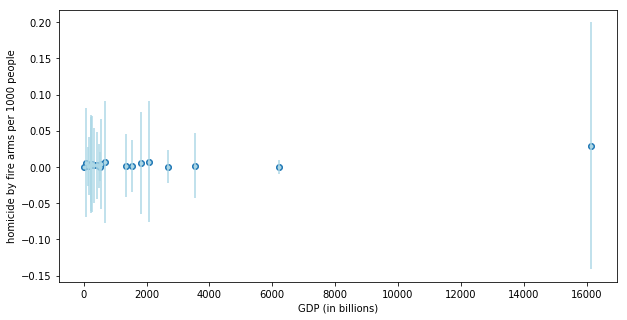

In [18]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['homicidepp'])
ax.errorbar(df_.gdp / 1e9, df_['homicidepp'], 
            yerr = np.sqrt(df_['homicidepp'] * 1.0), fmt = '.', color='lightblue')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("homicide by fire arms per 1000 people")
ax.set_ylim()
pl.show()

### The above plot also has a major outlier: US

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars

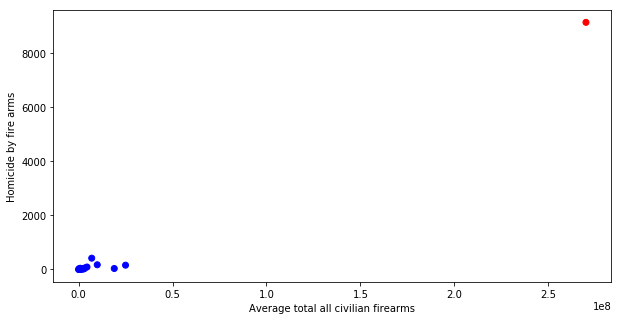

In [19]:
# no error bars

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'],
                     df_['Number of homicides by firearm'],
                    color = (df_['Country Name'] == 'United States').map({0:'b', 1:'r'}))
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Homicide by fire arms")
ax.set_ylim()
pl.show()

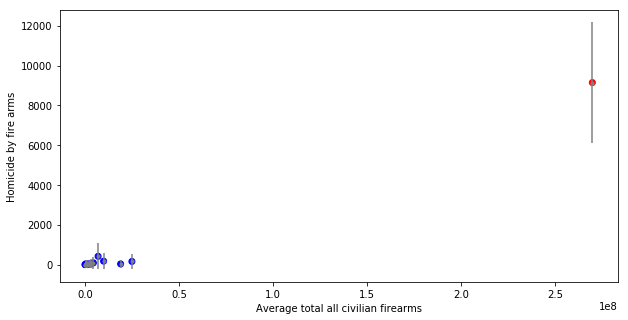

In [20]:
# with error bars

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'],
                     df_['Number of homicides by firearm'],
                    color = (df_['Country Name'] == 'United States').map({0:'b', 1:'r'})
)
ax.errorbar(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], 
            yerr = np.sqrt(df_['Number of homicides by firearm']*1000), fmt = '.', color='grey')
    
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Homicide by fire arms")
ax.set_ylim()
pl.show()

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


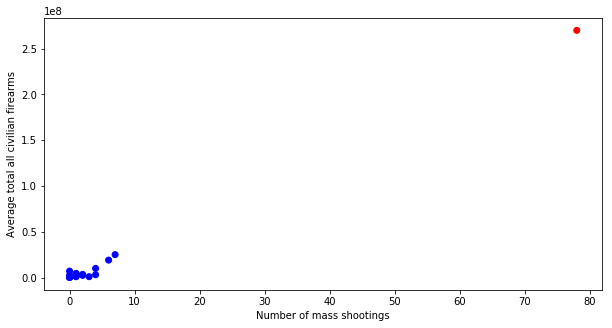

In [21]:
# no errors

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Number of mass shootings'],
                     df_['Average total all civilian firearms'],
                    color = (df_['Country Name'] == 'United States').map({0:'b', 1:'r'})
)
ax.set_xlabel("Number of mass shootings")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
pl.show()

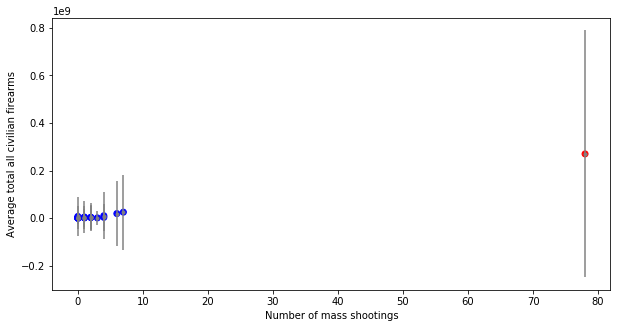

In [22]:
# with errors

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Number of mass shootings'],
                     df_['Average total all civilian firearms'],
                    color = (df_['Country Name'] == 'United States').map({0:'b', 1:'r'})
)
ax.errorbar(df_['Number of mass shootings'], df_['Average total all civilian firearms'], 
            yerr = np.sqrt(df_['Average total all civilian firearms']*1e9), fmt = '.', color='grey')
    
ax.set_xlabel("Number of mass shootings")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
pl.show()

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [23]:
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


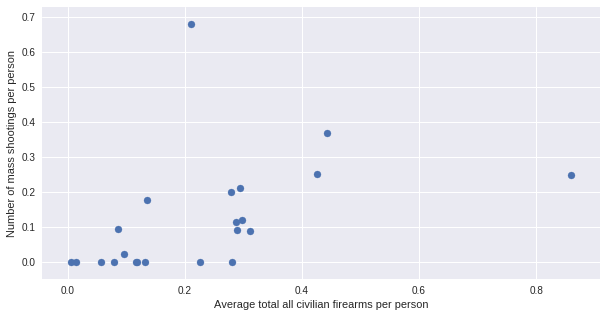

In [24]:
# first I plot as a simple scatter plot
# (just for myself)
# no errors

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['AverageFirearmspp'],
                     df_['shootingspp']*1000,
)

ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
pl.show()

In [25]:
# from GitHub: fedhere/UInotebooks/OLS/line_fit_and_residuals.ipynb

##this function will fit a line woth statsmodels packages, 
##both with and without including the noise int he fir parameter (WLS and OLS respectively)
##also i can use the statsmodels.formula package passing it a formula, which i will need
##when i want to fit a curve, not a straight line, to the data
def myregression(x, y, method=None): 
    if method == None or method == 'O':
        rm = sm.OLS(y, x)
    elif method == 'W':
        rm = sm.WLS(y, x)
    else:
        print("Problem in the way you called myregression")
        return -1
            
    reg = rm.fit()
    print("linear regression slope {}".format(reg.summary()))
    return reg

def line(a, b, x):
    return a*x + b

linear regression slope                             OLS Regression Results                            
Dep. Variable:            shootingspp   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     19.31
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           0.000253
Time:                        22:08:07   Log-Likelihood:                -39.436
No. Observations:                  22   AIC:                             80.87
Df Residuals:                      21   BIC:                             81.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
AverageFirearm

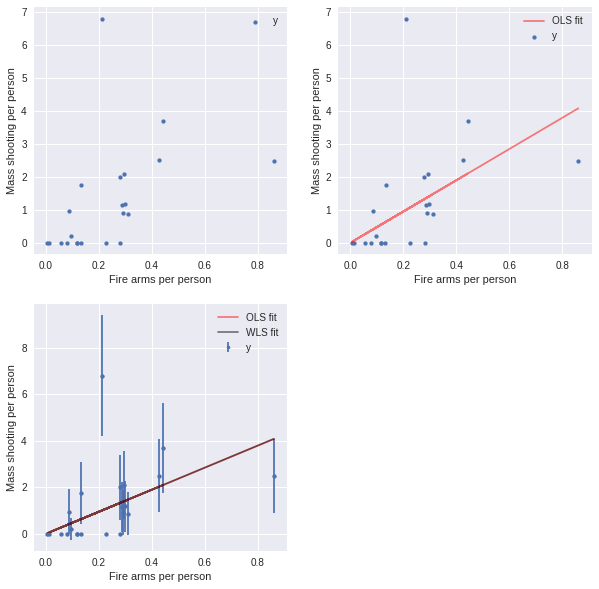

In [26]:
# from GitHub: fedhere/UInotebooks/OLS/line_fit_and_residuals.ipynb. I changed variables.

x = df_['AverageFirearmspp']
y = line(10, 0, df_['shootingspp']*1000)

rnew = myregression(x, y)
rwnew = myregression(x, y, method='W')

fig = pl.figure(figsize=(10,10))

ax = fig.add_subplot(221)
ax.scatter(x, y, label = "y", s = 15)
ax.set_xlabel('Fire arms per person')
ax.set_ylabel('Mass shooting per person')
ax.legend()

ax2 = fig.add_subplot(222)
ax2.scatter(x, y, label = "y", s = 15)
ax2.set_xlabel('Fire arms per person')
ax2.set_ylabel('Mass shooting per person')
ax2.plot(x, rnew.predict(x), label = 'OLS fit', color = 'r', alpha=0.5)
ax2.legend()

ax3 = fig.add_subplot(223)
ax3.scatter(x, y, label=None, s = 15)
ax3.set_xlabel('Fire arms per person')
ax3.set_ylabel('Mass shooting per person')
ax3.plot(x, rnew.predict(x), label = 'OLS fit', color = 'r', alpha=0.5)
ax3.plot(x, rwnew.predict(x), label = 'WLS fit', color = 'black', alpha=0.5)
ax3.errorbar(df_['AverageFirearmspp'], y, 
            yerr = np.sqrt(y), fmt = '.', label = 'y')
ax3.legend()

## Extra credit: confidence intervals


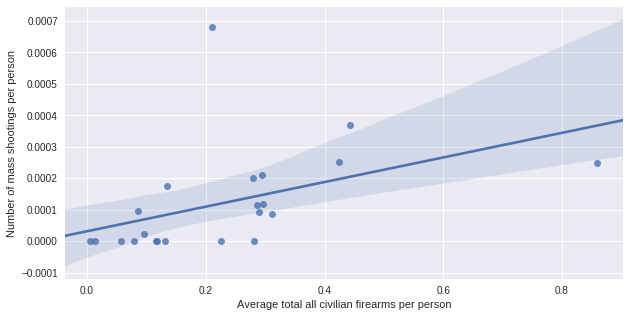

In [27]:
# just plotted the confidence interval

fig = pl.figure(figsize=(10,5))

sns.regplot(x="AverageFirearmspp", y="shootingspp", data=df_);
#pl.title('')
pl.ylabel("Number of mass shootings per person")
pl.xlabel("Average total all civilian firearms per person");

## Influence plot

linear regression slope                             OLS Regression Results                            
Dep. Variable:            shootingspp   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     19.31
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           0.000253
Time:                        22:08:40   Log-Likelihood:                -39.436
No. Observations:                  22   AIC:                             80.87
Df Residuals:                      21   BIC:                             81.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
AverageFirearm

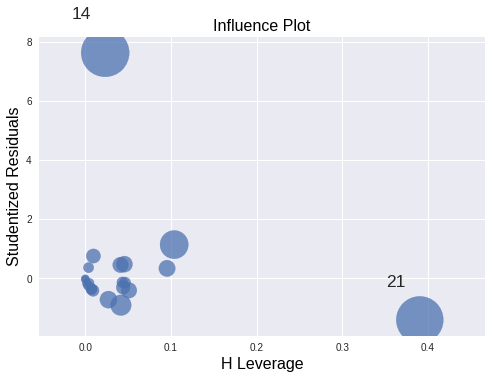

In [30]:
sm.graphics.influence_plot(myregression(x, y), alpha  = 0.05, criterion="cooks");